In [13]:
from pathlib import Path
import cv2

# 读取图片
img = cv2.imread('train/mode5/2A5R.png')

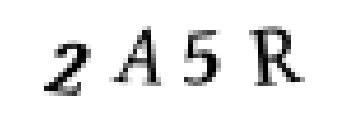

In [14]:
from matplotlib import pyplot as plt
# 显示图片
plt.imshow(img)
plt.axis('off')  # 不显示坐标轴
plt.show()

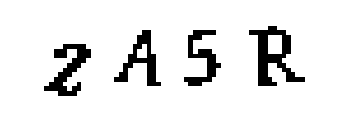

In [15]:
# 灰度图
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 二值化
_, img_binary = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# 显示二值化图片
plt.imshow(img_binary, cmap='gray')
plt.axis('off')  # 不显示坐标轴
plt.show()

In [16]:
img_binary

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

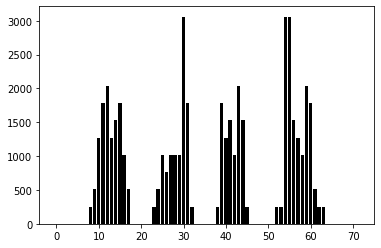

In [17]:
# 取反
img_binary = cv2.bitwise_not(img_binary)
# 垂直投影
verical_projection = img_binary.sum(axis=0)

# 显示垂直投影直方图
plt.bar(range(len(verical_projection)), verical_projection, color='black')
plt.show()


分割点位置: [20, 35, 48]


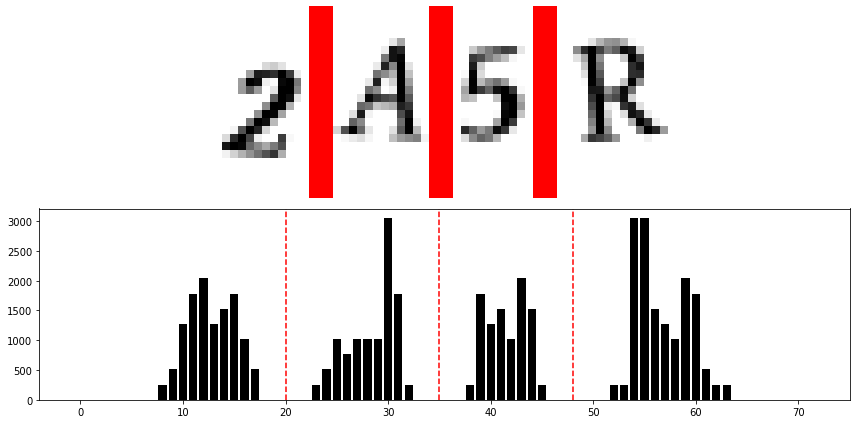

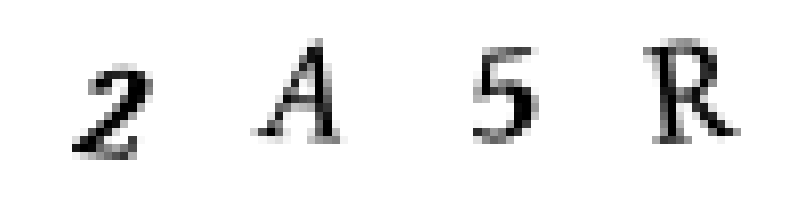

In [ ]:
import numpy as np
from scipy.signal import find_peaks

def find_char_boundaries(projection, num_chars=4):
    smoothed = np.convolve(projection, np.ones(5)/5, mode='same')
    
    valleys, _ = find_peaks(-smoothed, distance=5)
    
    valley_depths = [(v, smoothed[v]) for v in valleys]
    valley_depths.sort(key=lambda x: x[1])
    
    best_valleys = [v[0] for v in valley_depths[:num_chars-1]]
    best_valleys.sort()  # 按位置排序
    
    return best_valleys

split_points = find_char_boundaries(verical_projection)
print(f"分割点位置: {split_points}")

img_with_lines = img.copy()
for sp in split_points:
    cv2.line(img_with_lines, (sp, 0), (sp, img.shape[0]), (0, 0, 255), 2)

plt.figure(figsize=(12, 6))


plt.subplot(2, 1, 1)
plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 1, 2)
plt.bar(range(len(verical_projection)), verical_projection, color='black')
for sp in split_points:
    plt.axvline(x=sp, color='r', linestyle='--')

plt.tight_layout()
plt.show()

char_imgs = []
regions = [0] + split_points + [img.shape[1]]
for i in range(len(regions)-1):
    start, end = regions[i], regions[i+1]
    char_imgs.append(img[:, start:end])
plt.figure(figsize=(12, 3))
for i, char_img in enumerate(char_imgs):
    plt.subplot(1, len(char_imgs), i+1)
    plt.imshow(cv2.cvtColor(char_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.tight_layout()
plt.show()